<a href="https://colab.research.google.com/github/johnreyes96/artificial-vision/blob/master/src/main/python/playground/UtilitiesLoadAndViewImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

12/08/2022 -- Utilidades para la carga y visualización de imágenes.

(a.) Librerías para los códigos que se implemetarán.

In [1]:
# Importar numpy para dar soporte a:
# Concatenación de matrices - np.concatenate
import numpy as np

# Importar el módulo cv2 de la librería opencv
import cv2
from google.colab.patches import cv2_imshow

# Soporte para visualización.
import matplotlib.pyplot as plt



(b.) Carga de una imagen desde una ubicación en la carpeta Drive. Para esto se debe enlazar Colaboratory con la carpeta Drive de la cuenta.

In [ ]:
# Se debe conectar con el Drive, y luego buscar la ruta correcta para leer la imagen
im1 = cv2.imread('/content/drive/MyDrive/vision_artificial/images/kodim05.png', cv2.IMREAD_COLOR) # IMREAD_GRAYSCALE
# im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB) # OpenCV usa el ordenamiento BGR por defecto, mientras que matplotlib asume RGB.

# Referencia para línea 2: https://stackoverflow.com/questions/39316447/opencv-giving-wrong-color-to-colored-images-on-loading 

(c.) Visualización de la imagen y sus componentes de color. Se pueden utilizar varias funciones. Una posible opxión es usar imshow de la librería Matplotlib. Referencia: https://matplotlib.org/stable/tutorials/introductory/images.html

Tener presente que la paleta de color que se usa por defecto al invocar esta función. Evaluar esto mostrando por separado las componentes de color de la imagen RGB original.

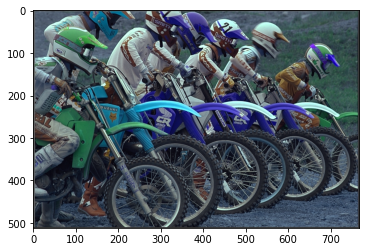

In [ ]:
# En este caso se usa una función de la librería Matplotlib
imgplot = plt.imshow(im1, cmap = "gray")

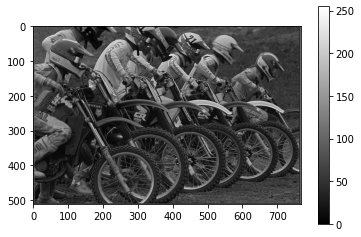

In [ ]:
R = im1[:,:,0]
G = im1[:,:,1]
B = im1[:,:,2]

imgplotR = plt.imshow(R, cmap="gray")
plt.colorbar() # Considere el uso de una barra de color para ver los valores mínimo y máximo en la imagen que se está mostrando.
# Otras paletas de colores disponibles para imshow: https://matplotlib.org/stable/tutorials/colors/colormaps.html

(d.) Mezclado de dos imágenes en escala de grises basado en operaciones ariméticas. La carga en escala de grises se puede hacer directamente con cv2-imread(... ,cv2.IMREAD_GRAYSCALE). Utilice la expresión C = kA - (1 - k)B, con 0 <= k <= 1.

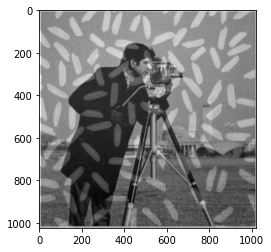

In [10]:
A = cv2.imread('/content/drive/MyDrive/vision_artificial/images/Cameraman.png', cv2.IMREAD_GRAYSCALE)
A = A[0:1024,0:1022]
B = cv2.imread('/content/drive/MyDrive/vision_artificial/images/Rice.png', cv2.IMREAD_GRAYSCALE)
k = 0.5
C = (k * A) + ((1 - k) * B)


imgplotC = plt.imshow(C, cmap="gray")
# MatLab Reshape -> WARNING: para hacerlo en python

(e.) Obtenga una composición con las dos imágenes de punto (d.) Esta vez, la composición consistirá en que una de las imágenes, concretamente una versión reducida, estará en la esquina inferior derecha de la otra imagen. **Extra-clase:** Generar el mismo efecto sugerido en (e.) pero con una secuencias de imágenes. Consultar cómo reproducir la secuencia de imágenes resultate a una velocidad de 30 fps.

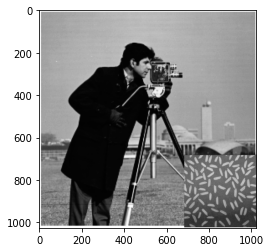

In [93]:
from PIL import Image, ImageDraw, ImageFilter

im1 = Image.open('/content/drive/MyDrive/vision_artificial/images/Cameraman.png')
im2 = Image.open('/content/drive/MyDrive/vision_artificial/images/Rice.png')

basewidth = 342 # set new width
wpercent = (basewidth / float(im2.size[0]))
hsize = int((float(im2.size[1]) * float(wpercent)))
im2 = im2.resize((basewidth, hsize), Image.ANTIALIAS) # scale image

im1.paste(im2, (682, 681))
im1.save('/content/drive/MyDrive/vision_artificial/images/Cameraman_Rice.png', quality=95)

composition = cv2.imread('/content/drive/MyDrive/vision_artificial/images/Cameraman_Rice.png', cv2.IMREAD_GRAYSCALE)
imgplotGG = plt.imshow(composition, cmap="gray")

(f.) Obtenga el operador inverso de una imagen, el cual se define como sigue: I_inv = max(I) - I.

En python: Escalar le resta una matriz -> func para calcular el máximo de la imagen: numpy.invert(matriz)

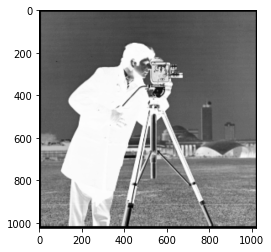

In [ ]:
invA = np.invert(np.copy(A))
imgplotC = plt.imshow(invA, cmap="gray")


(g.) Implemente el operador umbral para imágenes en escala de grises.

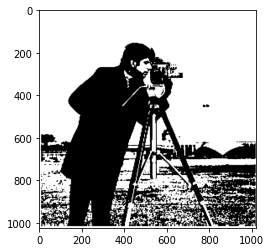

In [ ]:
thrIm = np.copy(A)
thr = 127
thrIm[A <= thr] = 0
thrIm[A > thr] = 1
imgplotD = plt.imshow(thrIm, cmap="gray")